*** 

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

***

# Assignment 4 - Predicting and understanding viewer engagement with educational videos 

With the accelerating popularity of online educational experiences, the role of online lectures and other educational video continues to increase in scope and importance. Open access educational repositories such as <a href="http://videolectures.net/">videolectures.net</a>, as well as Massive Open Online Courses (MOOCs) on platforms like Coursera, have made access to many thousands of lectures and tutorials an accessible option for millions of people around the world. Yet this impressive volume of content has also led to a challenge in how to find, filter, and match these videos with learners. This assignment gives you an example of how machine learning can be used to address part of that challenge.

## About the prediction problem

One critical property of a video is engagement: how interesting or "engaging" it is for viewers, so that they decide to keep watching. Engagement is critical for learning, whether the instruction is coming from a video or any other source. There are many ways to define engagement with video, but one common approach is to estimate it by measuring how much of the video a user watches. If the video is not interesting and does not engage a viewer, they will typically abandon it quickly, e.g. only watch 5 or 10% of the total. 

A first step towards providing the best-matching educational content is to understand which features of educational material make it engaging for learners in general. This is where predictive modeling can be applied, via supervised machine learning. For this assignment, your task is to predict how engaging an educational video is likely to be for viewers, based on a set of features extracted from the video's transcript, audio track, hosting site, and other sources.

We chose this prediction problem for several reasons:

* It combines a variety of features derived from a rich set of resources connected to the original data;
* The manageable dataset size means the dataset and supervised models for it can be easily explored on a wide variety of computing platforms;
* Predicting popularity or engagement for a media item, especially combined with understanding which features contribute to its success with viewers, is a fun problem but also a practical representative application of machine learning in a number of business and educational sectors.


## About the dataset

We extracted training and test datasets of educational video features from the VLE Dataset put together by researcher Sahan Bulathwela at University College London. 

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single educational video, and includes information about diverse properties of the video content as described further below. The target variable is `engagement` which was defined as True if the median percentage of the video watched across all viewers was at least 30%, and False otherwise.

Note: Any extra variables that may be included in the training set are simply for your interest if you want an additional source of data for visualization, or to enable unsupervised and semi-supervised approaches. However, they are not included in the test set and thus cannot be used for prediction. **Only the data already included in your Coursera directory can be used for training the model for this assignment.**

For this final assignment, you will bring together what you've learned across all four weeks of this course, by exploring different prediction models for this new dataset. In addition, we encourage you to apply what you've learned about model selection to do hyperparameter tuning using training/validation splits of the training data, to optimize the model and further increase its performance. In addition to a basic evaluation of model accuracy, we've also provided a utility function to visualize which features are most and least contributing to the overall model performance.

**File descriptions** 
    assets/train.csv - the training set (Use only this data for training your model!)
    assets/test.csv - the test set
<br>

**Data fields**

train.csv & test.csv:

    title_word_count - the number of words in the title of the video.
    
    document_entropy - a score indicating how varied the topics are covered in the video, based on the transcript. Videos with smaller entropy scores will tend to be more cohesive and more focused on a single topic.
    
    freshness - The number of days elapsed between 01/01/1970 and the lecture published date. Videos that are more recent will have higher freshness values.
    
    easiness - A text difficulty measure applied to the transcript. A lower score indicates more complex language used by the presenter.
    
    fraction_stopword_presence - A stopword is a very common word like 'the' or 'and'. This feature computes the fraction of all words that are stopwords in the video lecture transcript.
    
    speaker_speed - The average speaking rate in words per minute of the presenter in the video.
    
    silent_period_rate - The fraction of time in the lecture video that is silence (no speaking).
    
train.csv only:
    
    engagement - Target label for training. True if learners watched a substantial portion of the video (see description), or False otherwise.
    

## Evaluation

Your predictions will be given as the probability that the corresponding video will be engaging to learners.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model with an AUC (area under ROC curve) of at least 0.8 passes this assignment, and over 0.85 will receive full points.
___

For this assignment, create a function that trains a model to predict significant learner engagement with a video using `asset/train.csv`. Using this model, return a Pandas Series object of length 2309 with the data being the probability that each corresponding video from `readonly/test.csv` will be engaging (according to a model learned from the 'engagement' label in the training set), and the video index being in the `id` field.

Example:

    id
       9240    0.401958
       9241    0.105928
       9242    0.018572
                 ...
       9243    0.208567
       9244    0.818759
       9245    0.018528
             ...
       Name: engagement, dtype: float32
       
### Hints

* Make sure your code is working before submitting it to the autograder.

* Print out and check your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. 

* Try to avoid global variables. If you have other functions besides engagement_model, you should move those functions inside the scope of engagement_model.

* Be sure to first check the pinned threads in Week 4's discussion forum if you run into a problem you can't figure out.

### Extensions

* If this prediction task motivates you to explore further, you can find more details here on the original VLE dataset and others related to video engagement: https://github.com/sahanbull/VLE-Dataset



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
train = pd.read_csv("assets/train.csv")
train.head()

,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate,engagement
0,1,9,7.753995,16310,75.583936,0.553664,0.034049,2.997753,0.0,True
1,2,6,8.305269,15410,86.870523,0.584498,0.018763,2.635789,0.0,False
2,3,3,7.965583,15680,81.915968,0.605685,0.030720,2.538095,0.0,False
3,4,9,8.142877,15610,80.148937,0.593664,0.016873,2.259055,0.0,False
4,5,9,8.161250,14920,76.907549,0.581637,0.023412,2.420000,0.0,False


In [155]:
test = pd.read_csv("readonly/test.csv")
test.head()

prueba = test[test.columns[1:9]]

In [156]:
prueba

,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate
0,6,8.548351,14140,89.827395,0.640810,0.017945,2.262723,0.000000
1,8,7.730110,14600,82.446667,0.606738,0.027708,2.690351,0.000000
2,3,8.200887,16980,88.821542,0.621089,0.009857,3.116071,0.000000
3,5,6.377299,16260,86.874660,0.600000,0.004348,2.837500,0.017994
4,18,7.756530,14030,88.872277,0.616105,0.033240,1.354839,0.000000
...,...,...,...,...,...,...,...,...
2304,11,7.781813,13920,80.620236,0.611722,0.031276,2.193125,0.194918
2305,3,7.800766,13990,94.080225,0.654741,0.013967,1.580000,0.338601
2306,2,8.235828,14280,95.173070,0.618686,0.018486,5.548518,0.369348
2307,13,6.775492,15900,74.053098,0.560472,0.032448,2.592308,0.005131


#### Lets analyze the summarized info of the train dataset:
We can see the name of the features/columns, number of instances (including if there missing values) and the datatype for each feature.

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9239 entries, 0 to 9238
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9239 non-null   int64  
 1   title_word_count            9239 non-null   int64  
 2   document_entropy            9239 non-null   float64
 3   freshness                   9239 non-null   int64  
 4   easiness                    9239 non-null   float64
 5   fraction_stopword_presence  9239 non-null   float64
 6   normalization_rate          9239 non-null   float64
 7   speaker_speed               9239 non-null   float64
 8   silent_period_rate          9239 non-null   float64
 9   engagement                  9239 non-null   bool   
dtypes: bool(1), float64(6), int64(3)
memory usage: 658.8 KB


We can see that all the variables of interest are numeric, rather with int64 or float64 types

#### Lets analyze the variables in and independent manner:
In order to achieve that lets make histograms for each of the features: 'title_word_count', 'document_entropy', 'freshness', 'easiness',
       'fraction_stopword_presence', 'normalization_rate', 'speaker_speed',
       'silent_period_rate'

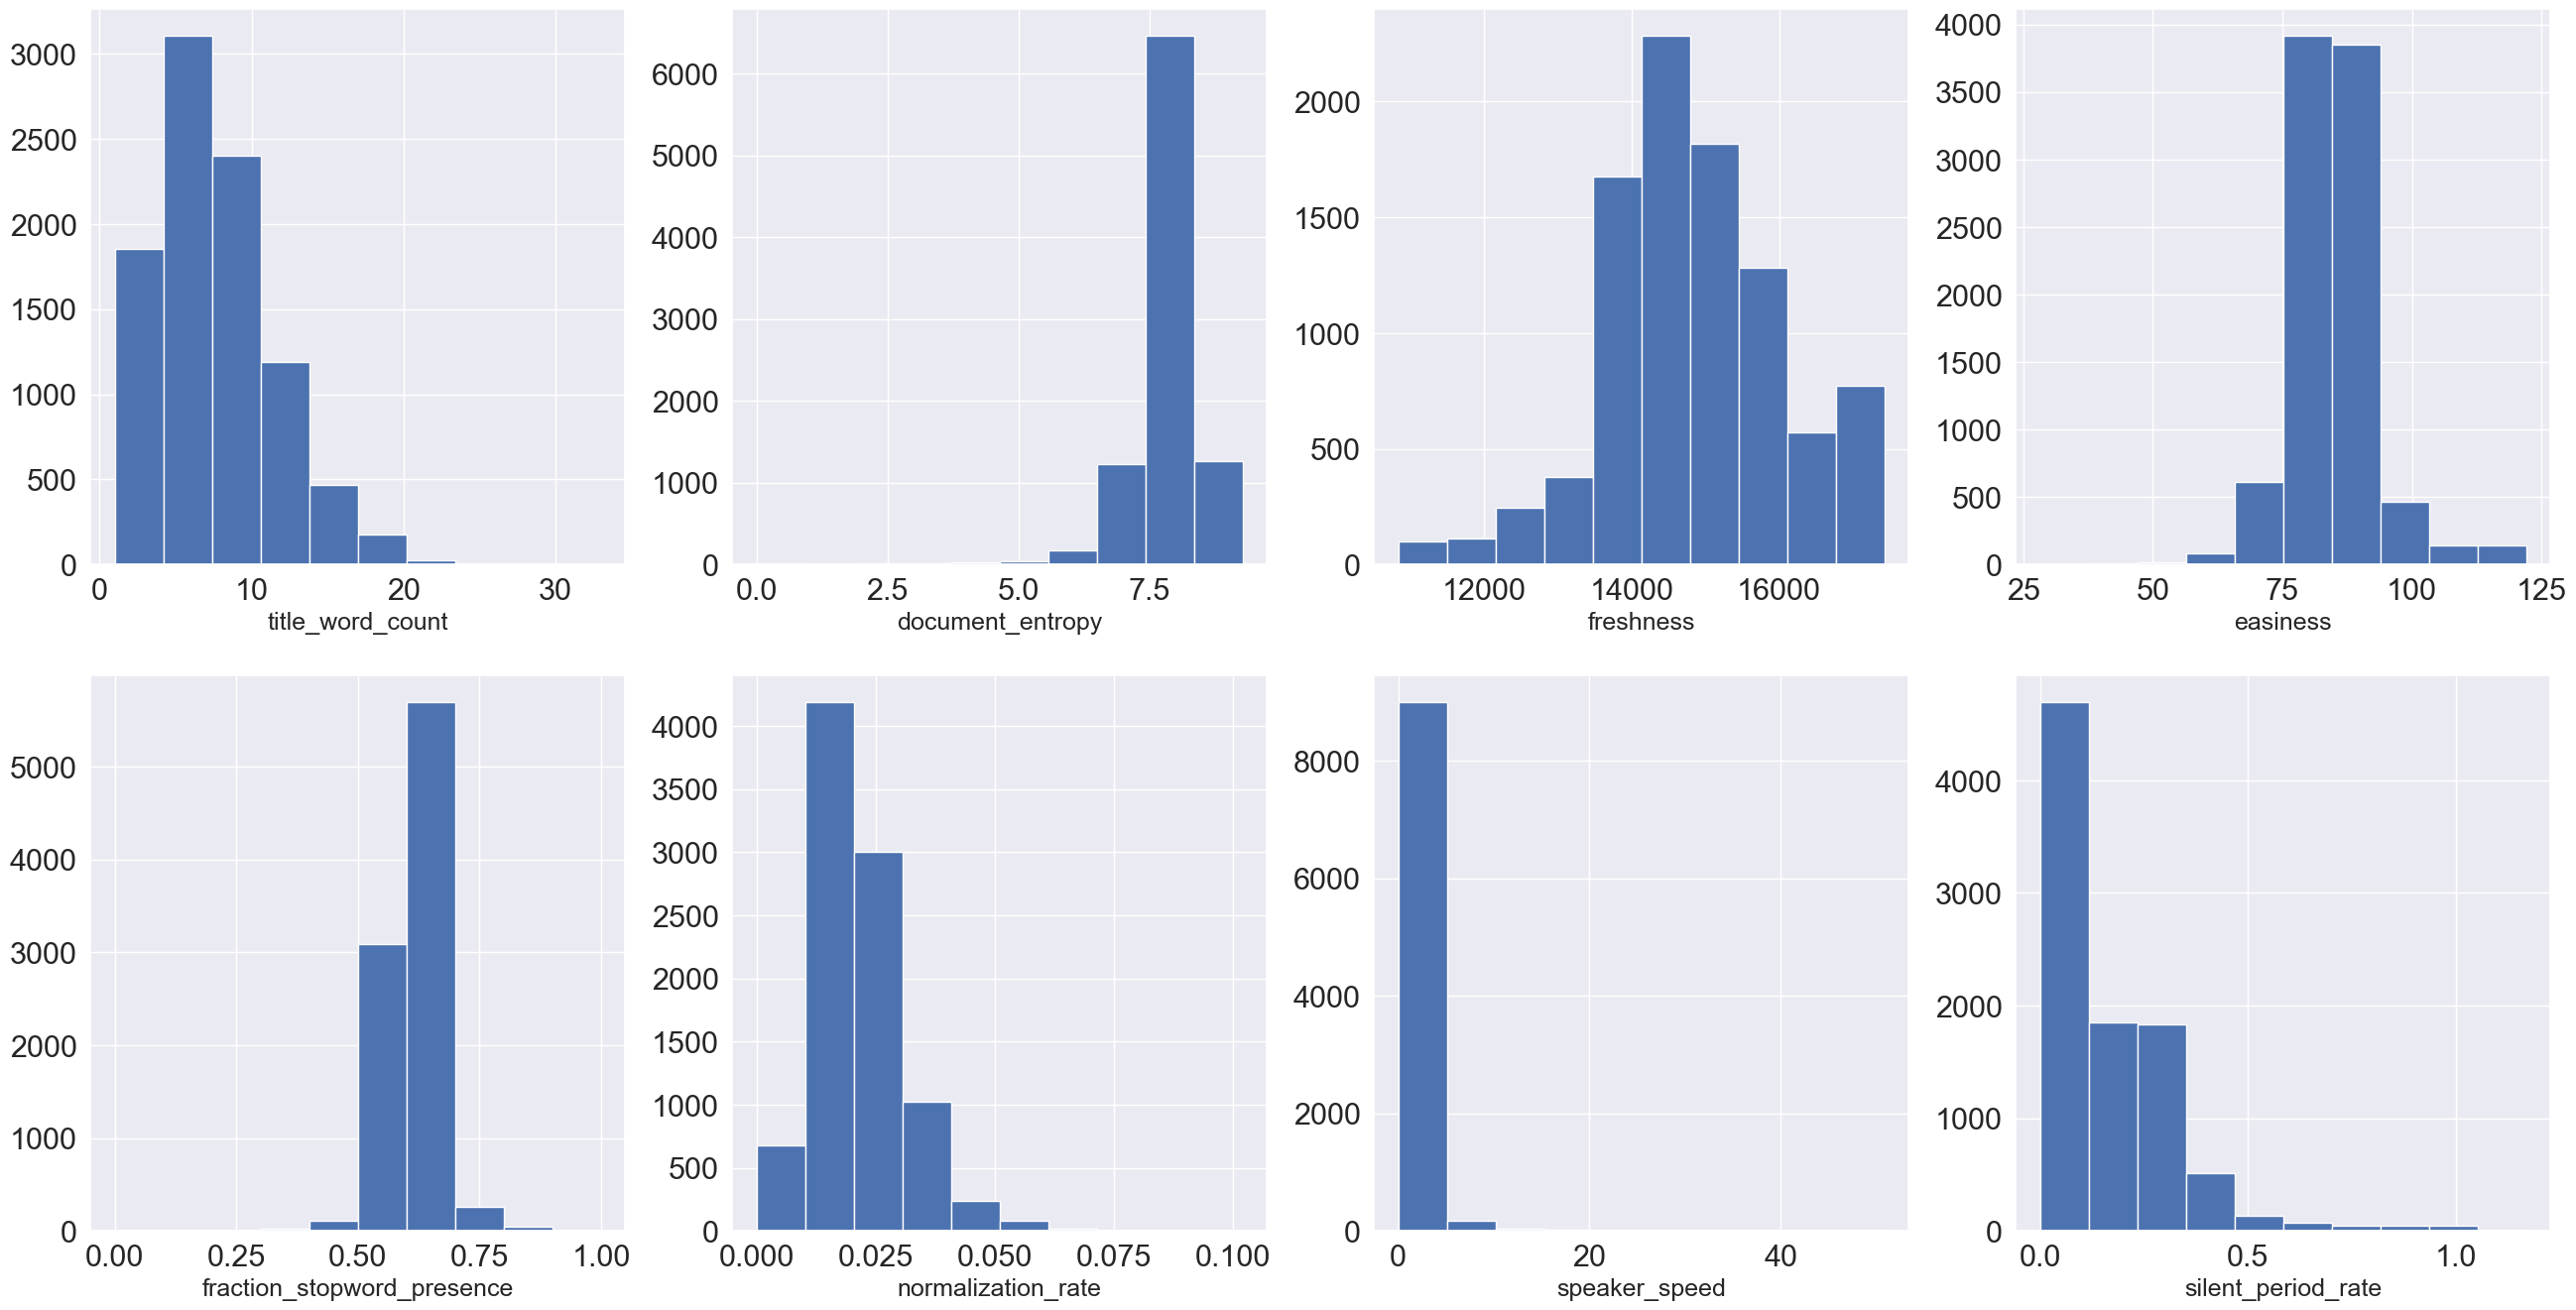

In [46]:
# Creates a figure and initialize a counter i
fig = plt.figure(figsize=(32,16))
i=0
# Iterates over each column of the train dataset, creates a subaxis within a grif of 2x4, defines its position in it, sets the of the x axis, makes the
# histogram and changes the value of the counter for the next column to be graphed (otherwise the plots will be overlayed).
for column in train.columns[1:-1]:
    ax = fig.add_subplot(2,4, i+1)
    ax.set_xlabel(column, fontsize=18)
    plt.hist(train[column])
    i = i + 1
    

Thanks to the histograms we can see the distribution of the variables and their range of values.
It is clear that "freshness" has big balues (ranging from 11000 to 17000) while silent_period_rate has small values (within 0-1)

In [ ]:
#### Lets see if there is any correlation between the variables of interest

In [6]:
correlations = train.iloc[:,1:-1].corr()
correlations

,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate
title_word_count,1.000000,0.007861,0.010169,-0.040933,-0.014945,0.039705,-0.076406,-0.007335
document_entropy,0.007861,1.000000,-0.140501,-0.376209,-0.057805,0.038679,0.264153,-0.352060
freshness,0.010169,-0.140501,1.000000,-0.191736,-0.110930,0.131065,0.016699,-0.414012
easiness,-0.040933,-0.376209,-0.191736,1.000000,0.577259,-0.604340,-0.112795,0.423378
fraction_stopword_presence,-0.014945,-0.057805,-0.110930,0.577259,1.000000,-0.291580,-0.026725,0.180411
normalization_rate,0.039705,0.038679,0.131065,-0.604340,-0.291580,1.000000,-0.002837,-0.134752
speaker_speed,-0.076406,0.264153,0.016699,-0.112795,-0.026725,-0.002837,1.000000,-0.111824
silent_period_rate,-0.007335,-0.352060,-0.414012,0.423378,0.180411,-0.134752,-0.111824,1.000000


In [ ]:
import seaborn as sns 
sns.heatmap(correlations, cmap="GnBu")

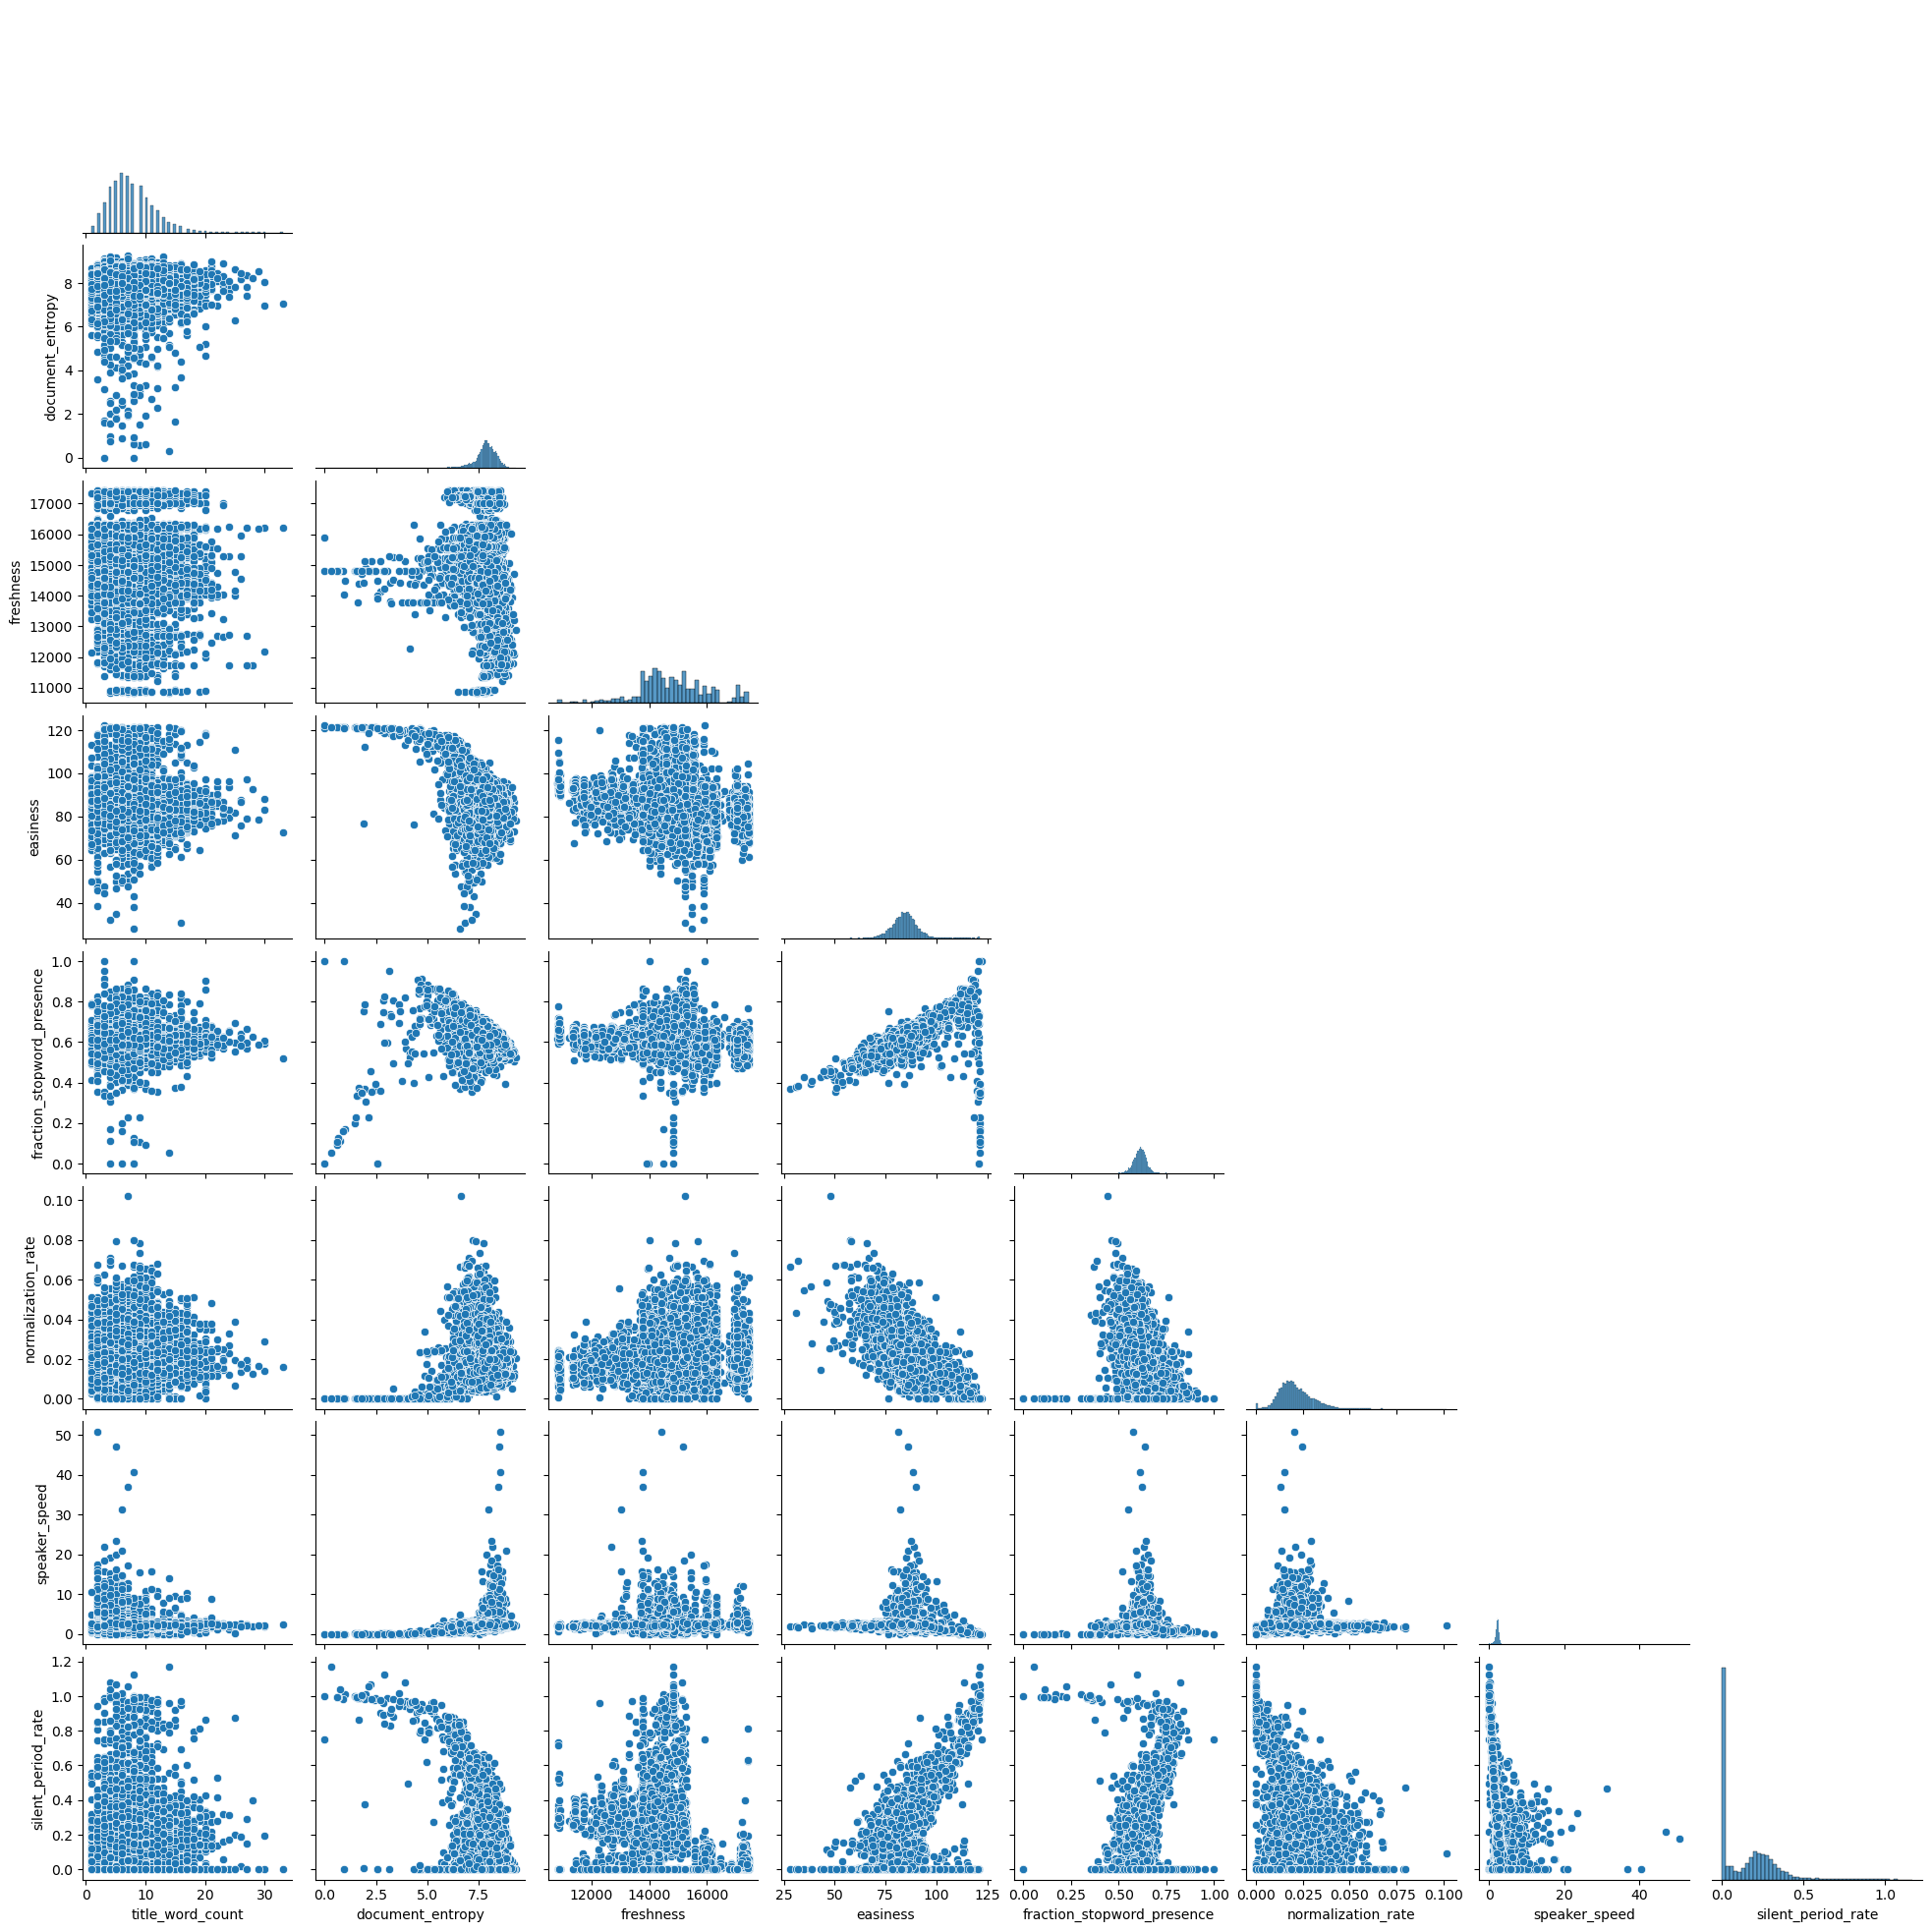

In [49]:
# If we want to see the correlations in a graphical way we can make a pairplot
sns.pairplot(train.iloc[:,1:-1], corner=True)

#### Split train dataset into Training and Testing datasets

In [66]:
from sklearn.model_selection import train_test_split

# Adds a new column "engagement_nr" where the boolean from "engagement" is transformed into 0 or 1 
train["engagement_nr"] = train["engagement"].astype(int)

# Chooses the columns with the 7 features of interest, "normalization_rate" is left out.
columns_interest = ['title_word_count', 'document_entropy', 'freshness', 'easiness',
                   'fraction_stopword_presence', 'speaker_speed', 'silent_period_rate']

# Divides the train dataframe in features and labels
X = train[train.columns[1:9]]
y = train["engagement_nr"]

# Split dataset into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [118]:
X

,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate
0,9,7.753995,16310,75.583936,0.553664,0.034049,2.997753,0.000000
1,6,8.305269,15410,86.870523,0.584498,0.018763,2.635789,0.000000
2,3,7.965583,15680,81.915968,0.605685,0.030720,2.538095,0.000000
3,9,8.142877,15610,80.148937,0.593664,0.016873,2.259055,0.000000
4,9,8.161250,14920,76.907549,0.581637,0.023412,2.420000,0.000000
...,...,...,...,...,...,...,...,...
9234,7,7.820262,14170,82.302473,0.587838,0.027449,2.120000,0.250322
9235,6,8.781639,14410,83.361440,0.588235,0.012465,2.251447,0.000000
9236,5,7.643789,16240,82.425897,0.611600,0.034213,2.728182,0.000000
9237,6,7.985593,14500,87.565381,0.630815,0.020167,2.529861,0.300094


##### Lets normalize Training and Testing datasets

In [67]:
from sklearn.preprocessing import MinMaxScaler

# Creates MinMaxScaler object, fits it and transforms X_train and X_test considering the fitting done in X_train
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
X_test_scaled

array([[0.125     , 0.82549947, 0.93930197, ..., 0.53837316, 0.04474468,
        0.        ],
       [0.0625    , 0.87230496, 0.74962064, ..., 0.16166983, 0.05598844,
        0.        ],
       [0.0625    , 0.90791523, 0.63277693, ..., 0.17416946, 0.05555697,
        0.        ],
       ...,
       [0.46875   , 0.88113618, 0.53717754, ..., 0.3113369 , 0.04090144,
        0.1537376 ],
       [0.1875    , 0.89421347, 0.80576631, ..., 0.46242973, 0.03421523,
        0.00230549],
       [0.40625   , 0.79430056, 0.83004552, ..., 0.49656551, 0.04091066,
        0.        ]])

#### Pipeline with different classifiers

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

model_pipeline = []
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(LogisticRegression(C=0.1))
model_pipeline.append(SVC(kernel='rbf', gamma=0.001, probability=True))
#model_pipeline.append(LinearSVC())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(GaussianNB())
model_pipeline.append(RandomForestClassifier(n_estimators=100, max_depth=30))
model_pipeline.append(GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators= 100))
model_pipeline.append(MLPClassifier())

#### Pipeline with different classifiers

In [101]:
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ["KNN Classifier", "Logistic Regression", "SVC", "Decision Tree", "Gaussian Naive Bayes",
            "Random Forest", "Gradient Boosting","MLP Classifier"]
acc_list =[]
auc_list = []
cm_list = []



for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))
    y_scores = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1])
    auc_list.append(round(auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))

#### Results

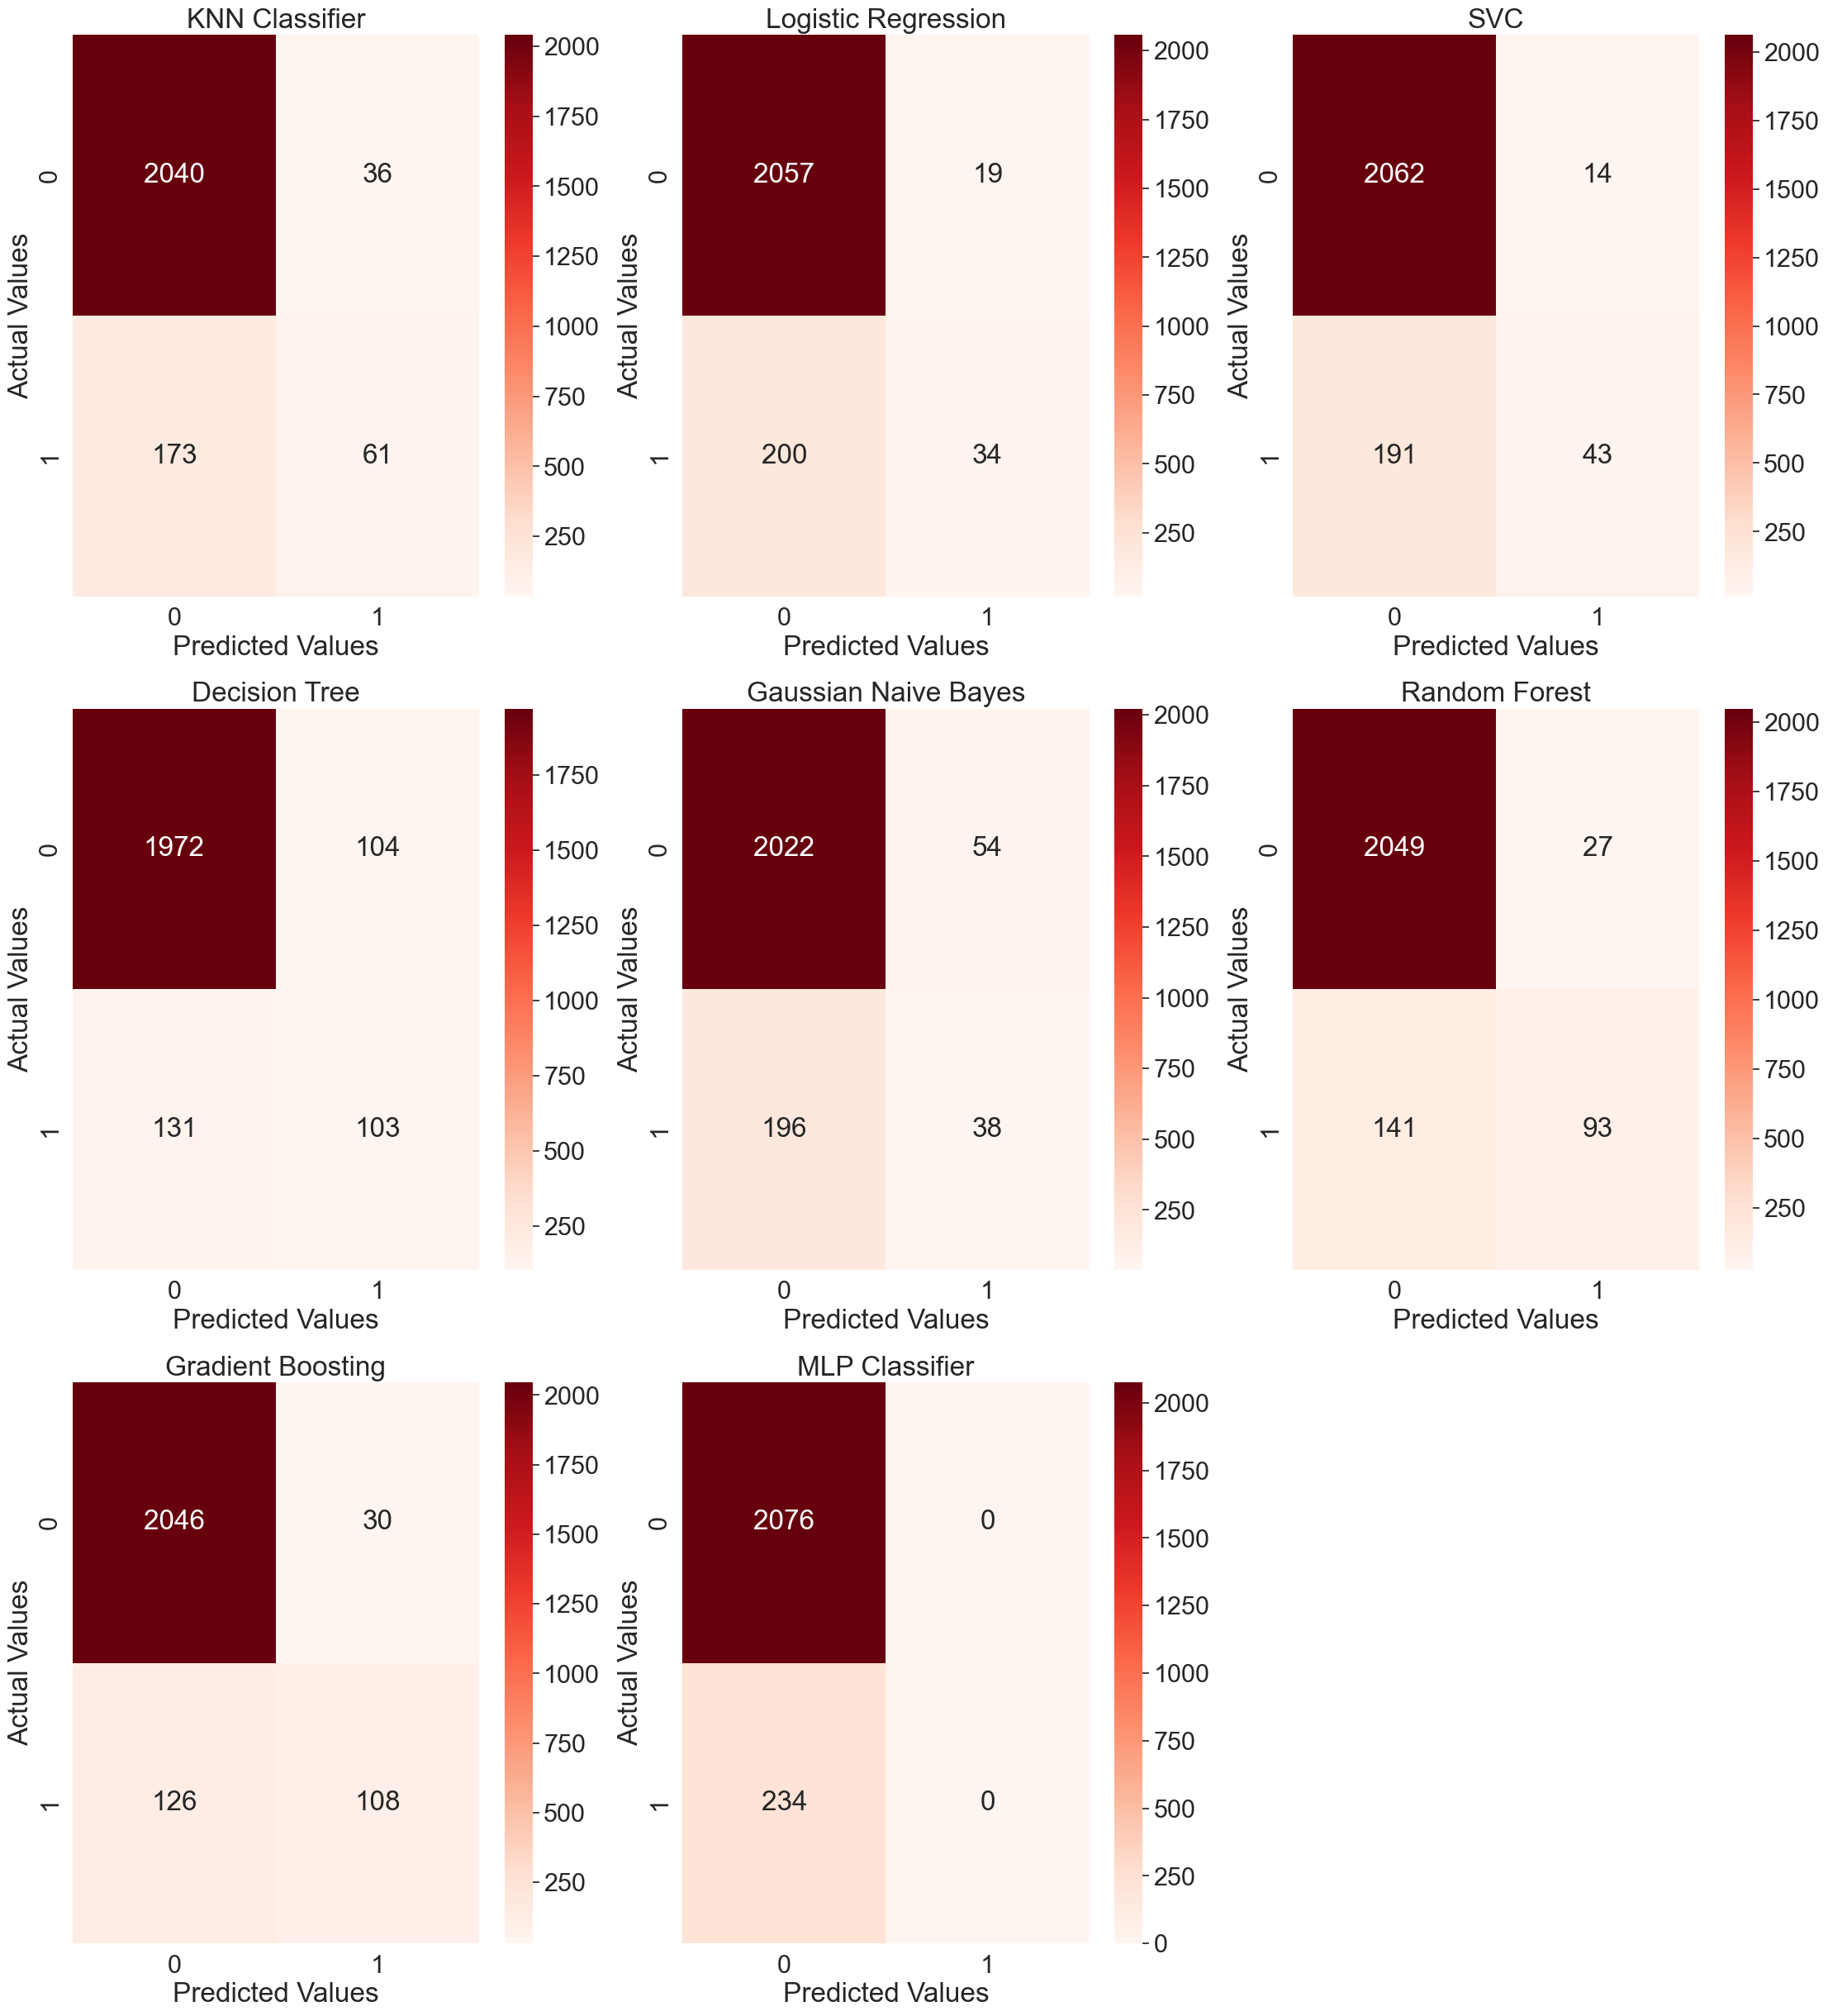

In [102]:
# Confusion Matrixes

import seaborn as sns


fig = plt.figure(figsize=(27,30))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(3,3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, fmt='g', cmap = "Reds")
    sns.set(font_scale=2)
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")
    

In [103]:
result_df = pd.DataFrame({"Model": model_list, "Accuracy":acc_list,"AUC":auc_list})

In [104]:
result_df

,Model,Accuracy,AUC
0,KNN Classifier,0.909524,0.74
1,Logistic Regression,0.905195,0.81
2,SVC,0.911255,0.75
3,Decision Tree,0.898268,0.70
4,Gaussian Naive Bayes,0.891775,0.81
5,Random Forest,0.927273,0.87
6,Gradient Boosting,0.932468,0.88
7,MLP Classifier,0.898701,0.29


#### First conslusions
All models predict accurately the class 0 but no the class 1.

So if we check the number of classes in the train data set, we can see the that there are a lot of instances for the class 0 (90% of the instances) and very little for the class 1 (10% of the instances), so the dataset is desbalanced.

As a result, the models are very good predicting Class 0 but bad predicting class 1


In [28]:
train.value_counts("engagement")

engagement
False    8342
True      897
dtype: int64

In [ ]:
svm = SVC(kernel='linear').fit(X_train, y_train)
y_predic = svm.predict(X_test)

In [ ]:
set(y_predic)

In [23]:
np.bincount(y_train)

array([6266,  663], dtype=int64)

In [24]:
np.bincount(y_test)

array([2076,  234], dtype=int64)

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Create the classifier we want to evaluate
clf = SVC(kernel='rbf')

grid_values = {'gamma': [0.00001, 0.0001, 0.001]}

## 2- Lets try another evaluation metric: AUC
# We will use the same grid_values with different gamma values in it
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

# As a result we can the wich hyperparameters provided the best evaluation metric results

Test set AUC:  0.7529498707244372
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.7518473721299856


In [84]:
# Create the classifier we want to evaluate
clf = LogisticRegression()
grid_values = {'C': [0.001,0.1,1,100,1000]}

## 2- Lets try another evaluation metric: AUC
# We will use the same grid_values with different gamma values in it
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Test set AUC:  0.80519325461522
Grid best parameter (max. AUC):  {'C': 0.1}
Grid best score (AUC):  0.8334926611036197


In [88]:
# Create the classifier we want to evaluate
clf = GradientBoostingClassifier()
clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)
grid_values = {'learning_rate': [0.1,0.01],'n_estimators': [10,100],'max_depth': [3,5,10]}

## 2- Lets try another evaluation metric: AUC
# We will use the same grid_values with different gamma values in it
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Test set AUC:  0.8790439783936894
Grid best parameter (max. AUC):  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Grid best score (AUC):  0.8923142567299462


In [92]:
# Create the classifier we want to evaluate
clf = GradientBoostingClassifier()
grid_values = {'learning_rate': [0.1,0.01],'n_estimators': [10,100],'max_depth': [3,5,10]}

## 2- Lets try another evaluation metric: AUC
# We will use the same grid_values with different gamma values in it
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train_scaled, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test_scaled) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Test set AUC:  0.8832351415443901
Grid best parameter (max. AUC):  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Grid best score (AUC):  0.8929595201691931


In [109]:
# Create the classifier we want to evaluate
# Here we use predict_proba to later calculate AUC ROC
# Attention: predict_proba gives as a result 2 columns, the first with the probability for class "0" and the second
# one the probability for class "1"

clf = KNeighborsClassifier()
grid_values = {'n_neighbors': [1,3,5,10,100,1000]}

## 2- Lets try another evaluation metric: AUC
# We will use the same grid_values with different gamma values in it
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train_scaled, y_train)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test_scaled) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc[:,1]))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Test set AUC:  0.8405258304102234
Grid best parameter (max. AUC):  {'n_neighbors': 100}
Grid best score (AUC):  0.8587967234306451


In [114]:
clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)
clf.fit(X_train, y_train)

y_decision_fn_scores_auc = clf.decision_function(X_test) 

print('Test set Area Under ROC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))


Test set AUC:  0.8822738089356585
Grid best parameter (max. AUC):  {'n_neighbors': 100}
Grid best score (AUC):  0.8587967234306451


In [162]:
proba = clf.predict_proba(prueba)[:,1]

In [163]:
type(proba)

numpy.ndarray

In [164]:
test["id"]

0        9240
1        9241
2        9242
3        9243
4        9244
        ...  
2304    11544
2305    11545
2306    11546
2307    11547
2308    11548
Name: id, Length: 2309, dtype: int64

In [165]:
rec = pd.Series(proba, name="engagement", index=test["id"], dtype='float32')

In [166]:
rec

id
9240     0.008266
9241     0.038085
9242     0.121257
9243     0.966130
9244     0.009334
           ...   
11544    0.019631
11545    0.005853
11546    0.008807
11547    0.947314
11548    0.014597
Name: engagement, Length: 2309, dtype: float32

In [171]:
def engagement_model():
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import GradientBoostingClassifier
    
    rec = None
    
    # YOUR CODE HERE
    # Loading datasets
    train = pd.read_csv("assets/train.csv")
    test = pd.read_csv("assets/test.csv")
    
    # Adding a column where engagement is changed for 1´s or 0´s instead of True/False
    train["engagement_nr"] = train["engagement"].astype(int)
                                                        
    # Dividing the train dataframe in features and labels
    X = train[train.columns[1:9]]
    y = train["engagement_nr"]
    test_features = test[test.columns[1:9]]
                                                        

    # Splitting dataset into Training and Testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Creating and fitting the Gradient Boosting Classifier
    clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)
    clf.fit(X_train, y_train)
    
    # Computing the probabilities of the instances of the train.csv dataset using only it´s features
    test_proba = clf.predict_proba(test_features)[:,1]
                                                        
    rec = pd.Series(test_proba, name="engagement", index=test["id"], dtype='float32')
    
    #raise NotImplementedError()
    
    return rec

In [172]:
engagement_model()

id
9240     0.008690
9241     0.038907
9242     0.093448
9243     0.957880
9244     0.008836
           ...   
11544    0.019698
11545    0.006392
11546    0.009241
11547    0.930901
11548    0.011979
Name: engagement, Length: 2309, dtype: float32